## BME 544 Assignment 6

In [139]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import iirnotch, freqz, sosfiltfilt, hilbert, butter, filtfilt, welch

# Parameters
fs = 1000           # Sampling frequency (Hz)
f0 = 60             # Base line frequency (Hz)
num_harmonics = 7   # Number of harmonics to filter (e.g., 60, 120, 180 Hz)
Q = 30              # Quality factor

# Design cascaded notch filters as second-order sections
sos_sections = []

for n in range(1, num_harmonics + 1):
    notch_freq = n * f0
    if notch_freq >= fs / 2:
        continue  # Skip if notch freq is above Nyquist
    b, a = iirnotch(notch_freq, Q, fs)
    sos_sections.append((b, a))

# Compute combined frequency response
w = np.linspace(0, np.pi, 8000)
h_total = np.ones_like(w, dtype=complex)

for b, a in sos_sections:
    w_i, h_i = freqz(b, a, worN=w)
    h_total *= h_i

frequencies = w * fs / (2 * np.pi)
magnitude_db = 20 * np.log10(abs(h_total))
phase = np.angle(h_total)

# # Plotting
# plt.figure(figsize=(12, 6))

# # Magnitude
# plt.subplot(2, 1, 1)
# plt.plot(frequencies, magnitude_db)
# plt.title(f'IIR Notch Filter (Fundamental + {num_harmonics - 1} Harmonics)')
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Magnitude (dB)')
# plt.grid(True)
# for n in range(1, num_harmonics + 1):
#     nf = n * f0
#     if nf < fs / 2:
#         plt.axvline(nf, color='red', linestyle='--', label=f'{nf} Hz')
# plt.legend()

# # Phase
# plt.subplot(2, 1, 2)
# plt.plot(frequencies, phase)
# plt.xlabel('Frequency (Hz)')
# plt.ylabel('Phase (radians)')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [140]:
filename = "DC_4/MVC.txt"

# Load data (skip header)
data = np.loadtxt(filename, skiprows=1)

# Separate columns
time = data[:, 0]
sig = data[:, 1]

# Sampling rate and FFT
fs = 1000  # Hz
n = len(sig)

### 2. Maximum Voluntary Contraction (MVC)

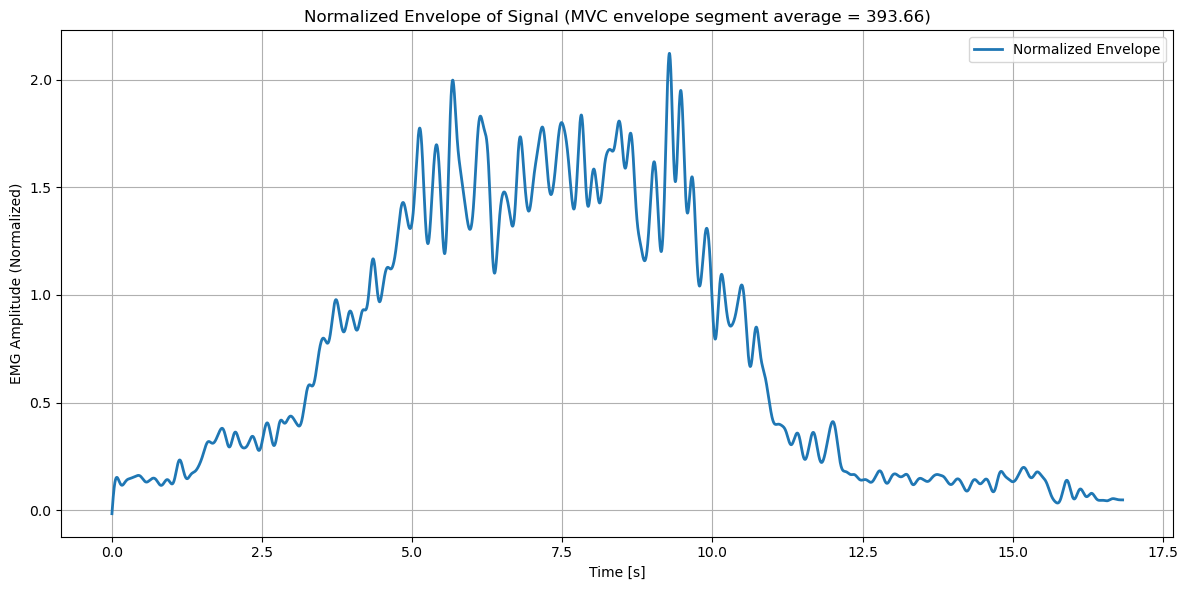

In [141]:
interval = [1.2, 12.5]

analytic_signal = hilbert(sig)
envelope = np.abs(analytic_signal)

cutoff = 5
b, a = butter(N=4, Wn=cutoff / (0.5 * fs), btype='low')
envelope_filtered = filtfilt(b, a, envelope)

mask = (time >= interval[0]) & (time <= interval[1])
avg_env = np.mean(envelope_filtered[mask])

envelope_normalized = envelope_filtered / avg_env

plt.figure(figsize=(12, 6))
plt.plot(time, envelope_normalized, label='Normalized Envelope', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('EMG Amplitude (Normalized)')
plt.title(f'Normalized Envelope of Signal (MVC envelope segment average = {avg_env:.2f})')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### 3. EMG for two levels of force

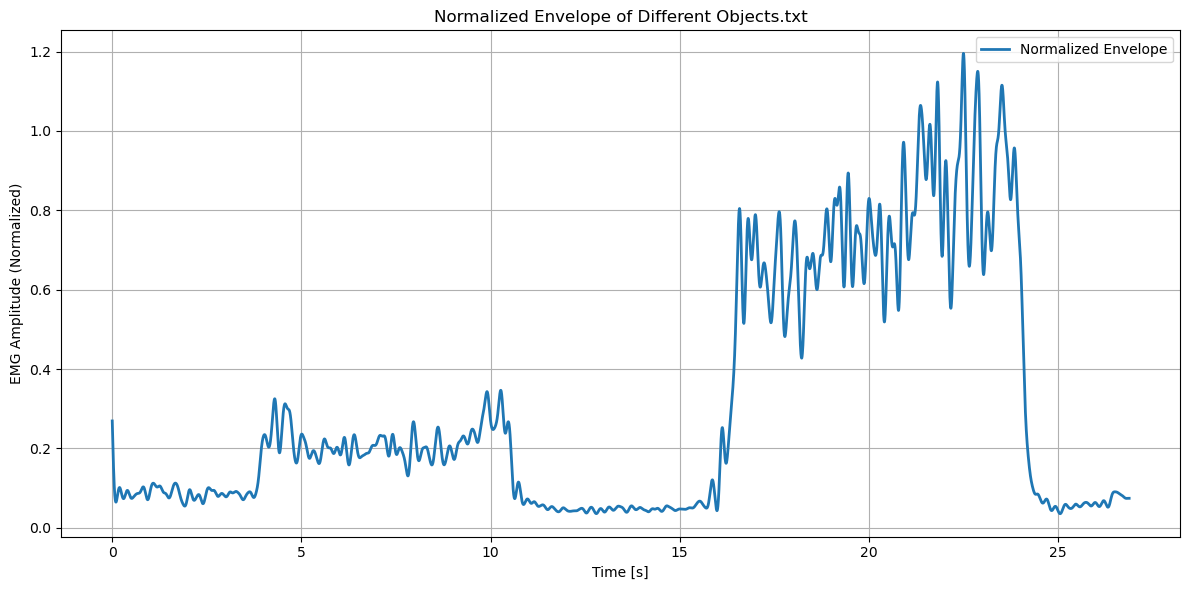

Interval 1 (3.8-10.8s):
  Mean Frequency: 73.05 Hz
  Median Frequency: 54.69 Hz

Interval 2 (16-24.5s):
  Mean Frequency: 77.87 Hz
  Median Frequency: 63.48 Hz



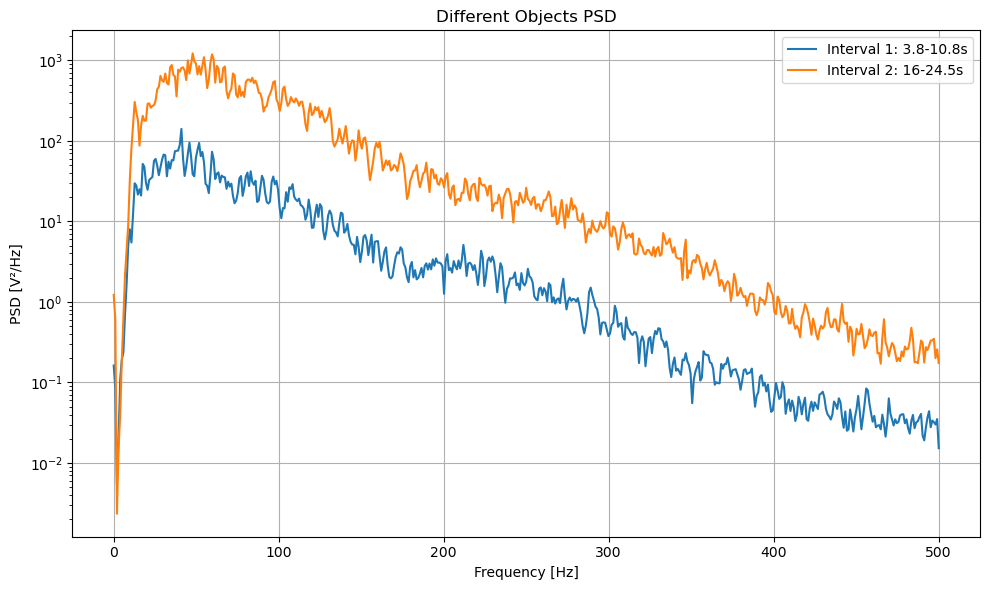

In [142]:
filename = "DC_4/Different Objects.txt"
intervals = [(3.8, 10.8), (16, 24.5)]

data = np.loadtxt(filename, skiprows=1)

time = data[:, 0]
sig = data[:, 1]

fs = 1000
n = len(sig)

analytic_signal = hilbert(sig)
envelope = np.abs(analytic_signal)

cutoff = 5
b, a = butter(N=4, Wn=cutoff / (0.5 * fs), btype='low')
envelope_filtered = filtfilt(b, a, envelope)

envelope_normalized = envelope_filtered / avg_env

plt.figure(figsize=(12, 6))
plt.plot(time, envelope_normalized, label='Normalized Envelope', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('EMG Amplitude (Normalized)')
plt.title(f'Normalized Envelope of Different Objects.txt')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, (start, end) in enumerate(intervals):
    mask = (time >= start) & (time <= end)
    segment = sig[mask]

    f, Pxx = welch(segment, fs=fs, nperseg=1024)

    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)

    cumulative_power = np.cumsum(Pxx)
    total_power = cumulative_power[-1]
    median_freq = f[np.searchsorted(cumulative_power, total_power / 2)]

    plt.semilogy(f, Pxx, label=f'Interval {i+1}: {start}-{end}s')

    print(f"Interval {i+1} ({start}-{end}s):")
    print(f"  Mean Frequency: {mean_freq:.2f} Hz")
    print(f"  Median Frequency: {median_freq:.2f} Hz\n")

plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V²/Hz]')
plt.title('Different Objects PSD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 4. Sustained (sub-MVC) force

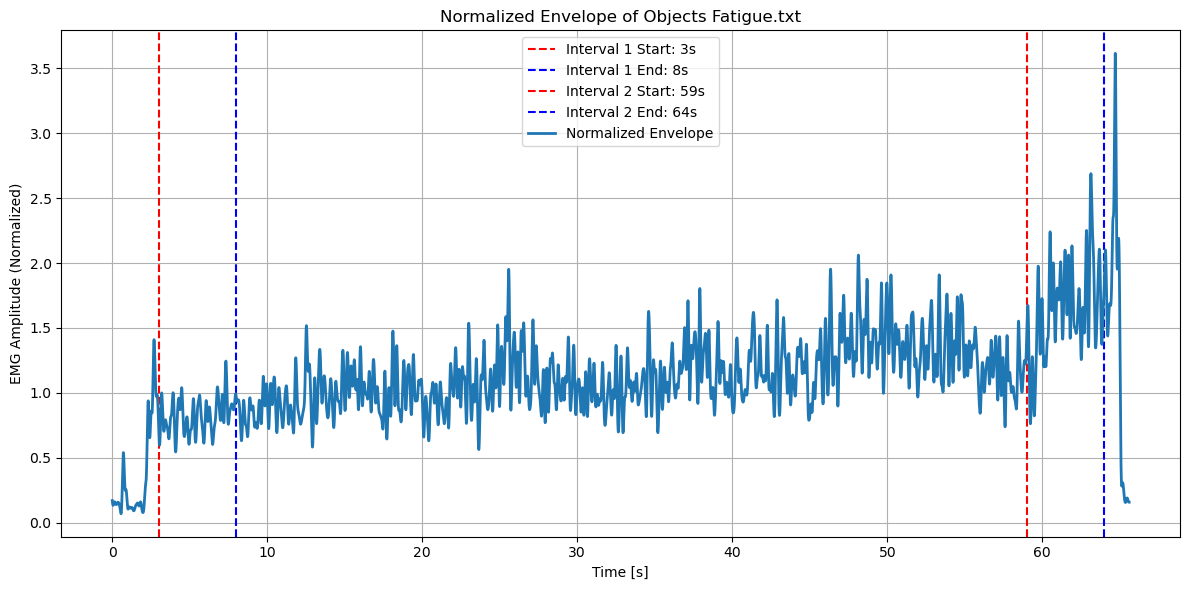

Interval 1 (3-8s):
  Mean Frequency: 90.09 Hz
  Median Frequency: 77.15 Hz

Interval 2 (59-64s):
  Mean Frequency: 68.34 Hz
  Median Frequency: 55.66 Hz



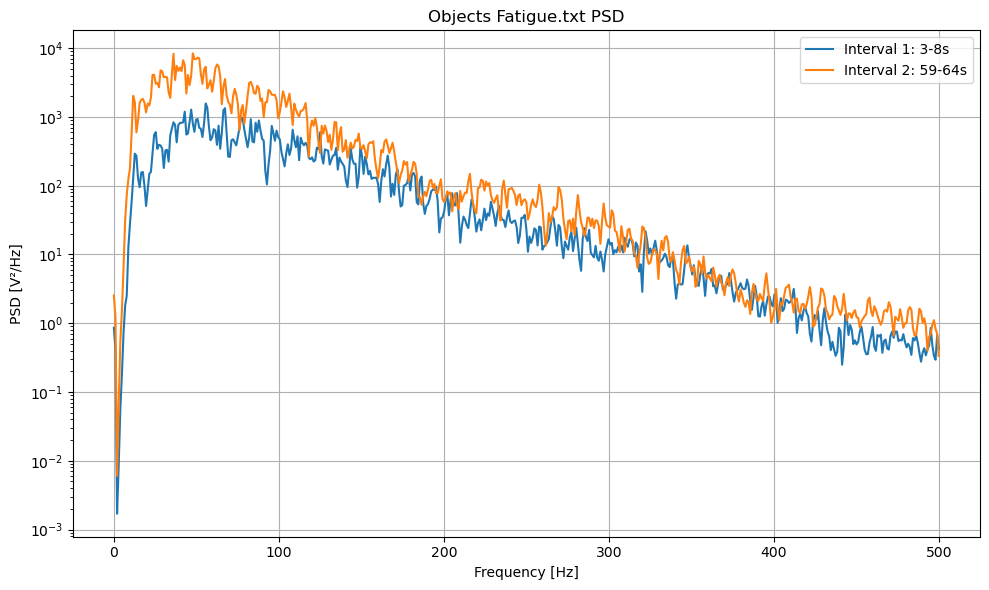

In [143]:
filename = "DC_4/Objects Fatigue.txt"
intervals = [[3, 8], [59, 64]]

data = np.loadtxt(filename, skiprows=1)

time = data[:, 0]
sig = data[:, 1]

fs = 1000
n = len(sig)

analytic_signal = hilbert(sig)
envelope = np.abs(analytic_signal)

cutoff = 5
b, a = butter(N=4, Wn=cutoff / (0.5 * fs), btype='low')
envelope_filtered = filtfilt(b, a, envelope)

envelope_normalized = envelope_filtered / avg_env

plt.figure(figsize=(12, 6))
for i, interval in enumerate(intervals):
    plt.axvline(x=interval[0], color='red', linestyle='--', label=f'Interval {i+1} Start: {interval[0]}s')
    plt.axvline(x=interval[1], color='blue', linestyle='--', label=f'Interval {i+1} End: {interval[1]}s')
plt.plot(time, envelope_normalized, label='Normalized Envelope', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('EMG Amplitude (Normalized)')
plt.title(f'Normalized Envelope of Objects Fatigue.txt')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, (start, end) in enumerate(intervals):
    mask = (time >= start) & (time <= end)
    segment = sig[mask]

    f, Pxx = welch(segment, fs=fs, nperseg=1024)

    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)

    cumulative_power = np.cumsum(Pxx)
    total_power = cumulative_power[-1]
    median_freq = f[np.searchsorted(cumulative_power, total_power / 2)]

    plt.semilogy(f, Pxx, label=f'Interval {i+1}: {start}-{end}s')

    print(f"Interval {i+1} ({start}-{end}s):")
    print(f"  Mean Frequency: {mean_freq:.2f} Hz")
    print(f"  Median Frequency: {median_freq:.2f} Hz\n")

plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V²/Hz]')
plt.title('Objects Fatigue.txt PSD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### 5. Sustained MVC

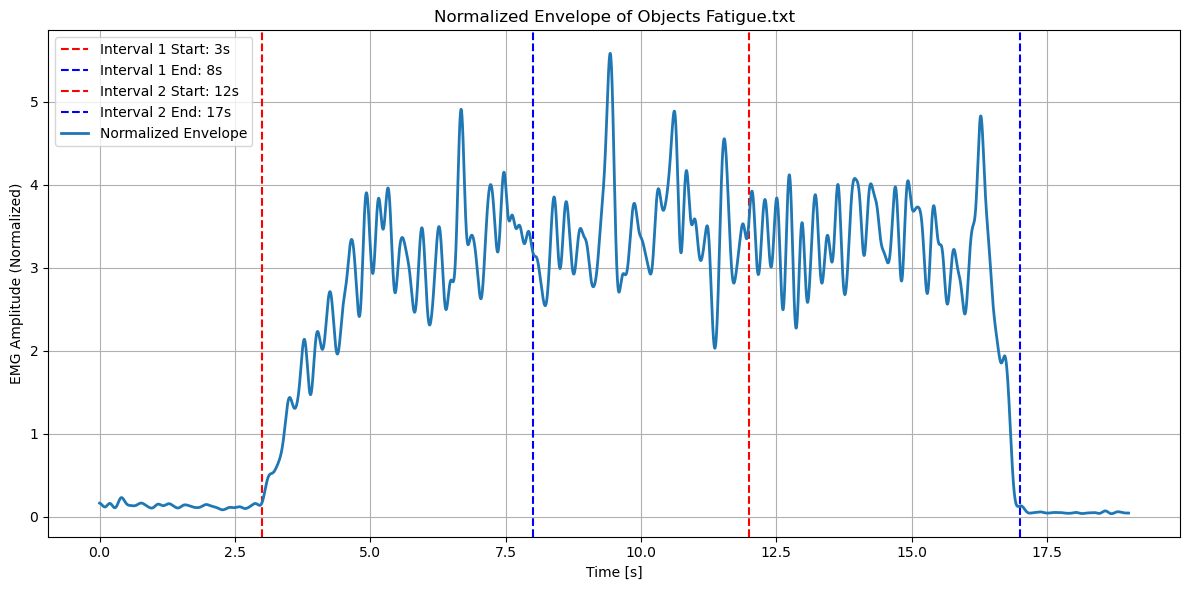

Interval 1 (3-8s):
  Mean Frequency: 94.58 Hz
  Median Frequency: 83.98 Hz

Interval 2 (12-17s):
  Mean Frequency: 72.42 Hz
  Median Frequency: 62.50 Hz



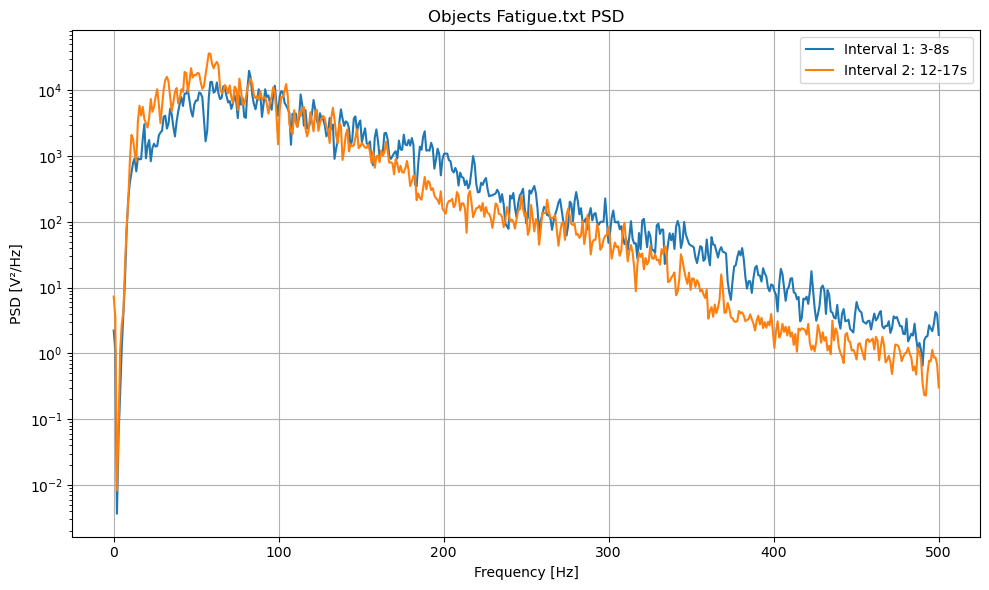

In [144]:
filename = "DC_4/MVC Fatigue.txt"
intervals = [(3, 8), (12, 17)]

data = np.loadtxt(filename, skiprows=1)

time = data[:, 0]
sig = data[:, 1]

fs = 1000
n = len(sig)

analytic_signal = hilbert(sig)
envelope = np.abs(analytic_signal)

cutoff = 5
b, a = butter(N=4, Wn=cutoff / (0.5 * fs), btype='low')
envelope_filtered = filtfilt(b, a, envelope)

envelope_normalized = envelope_filtered / avg_env

plt.figure(figsize=(12, 6))
for i, interval in enumerate(intervals):
    plt.axvline(x=interval[0], color='red', linestyle='--', label=f'Interval {i+1} Start: {interval[0]}s')
    plt.axvline(x=interval[1], color='blue', linestyle='--', label=f'Interval {i+1} End: {interval[1]}s')
plt.plot(time, envelope_normalized, label='Normalized Envelope', linewidth=2)
plt.xlabel('Time [s]')
plt.ylabel('EMG Amplitude (Normalized)')
plt.title(f'Normalized Envelope of Objects Fatigue.txt')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
for i, (start, end) in enumerate(intervals):
    mask = (time >= start) & (time <= end)
    segment = sig[mask]

    f, Pxx = welch(segment, fs=fs, nperseg=1024)

    mean_freq = np.sum(f * Pxx) / np.sum(Pxx)

    cumulative_power = np.cumsum(Pxx)
    total_power = cumulative_power[-1]
    median_freq = f[np.searchsorted(cumulative_power, total_power / 2)]

    plt.semilogy(f, Pxx, label=f'Interval {i+1}: {start}-{end}s')

    print(f"Interval {i+1} ({start}-{end}s):")
    print(f"  Mean Frequency: {mean_freq:.2f} Hz")
    print(f"  Median Frequency: {median_freq:.2f} Hz\n")

plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V²/Hz]')
plt.title('Objects Fatigue.txt PSD')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()